In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###### Sorting and importing data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source 
from IPython.display import display

plt.style.use('classic') 

master = pd.read_csv('/content/drive/My Drive/Colab Notebooks/class_and_tutorials/Project/train-data.csv')
master = pd.DataFrame(data=master)

master = master.drop(columns='New_Price')
master = master.drop(columns='Location')

original_column_Unnamed= master[['Unnamed: 0']]
changed_column_Unnamed=master[['Unnamed: 0']]
master = master.drop(columns='Unnamed: 0')
master3=master
master = master.dropna()         # remove all missing value from master 


# here we will remove the unwanted units. we only want the data. without the units.
master['Engine'] = master['Engine'].map(lambda x: x.rstrip('CC'))
master['Power'] = master['Power'].map(lambda x: x.rstrip('bhp'))
master['Mileage'] = master['Mileage'].map(lambda x: x.rstrip('kmpl'))
master['Mileage'] = master['Mileage'].map(lambda x: x.rstrip('km/kg'))

master['Mileage'] = master['Mileage'].str.extract('(\d+)', expand=False)
master['Mileage'] = master['Mileage'].astype(int)
master['Power'] = master['Power'].str.extract('(\d+)', expand=False)
master['Power'] = master['Mileage'].astype(int)
master['Engine'] = master['Engine'].str.extract('(\d+)', expand=False)
master['Engine'] = master['Engine'].astype(int)

# giving each column we going to use a name. easier to use that way.
Price=master['Price']
Year=master['Year']
Kilometers_Driven=master['Kilometers_Driven']
Engine=master['Engine']
Power=master['Power']
Seats=master['Seats']
Mileage=master['Mileage']



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

###### SHOW Master

In [4]:
master

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26,998,26,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19,1582,19,5.0,12.50
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18,1199,18,5.0,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20,1248,20,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15,1968,15,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28,1248,28,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24,1120,24,5.0,4.00
6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14,2498,14,8.0,2.90
6017,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18,998,18,5.0,2.65


###### Cars Name (by company) order


In [5]:
### A = Audi, Ambassador 
master.loc[master['Name'].str.contains('Audi'), 'Name'] = 'Audi'
master.loc[master['Name'].str.contains('Ambassador'), 'Name'] = 'Ambassador'

### B = Bentley, BMW
master.loc[master['Name'].str.contains('Bentley'), 'Name'] = 'Bentley'
master.loc[master['Name'].str.contains('BMW'), 'Name'] = 'BMW'

### C = Chevrolet
master.loc[master['Name'].str.contains('Chevrolet'), 'Name'] = 'Chevrolet'

### D = Datsun
master.loc[master['Name'].str.contains('Datsun'), 'Name'] = 'Datsun'

### F = Fiat, Force, Ford
master.loc[master['Name'].str.contains('Fiat'), 'Name'] = 'Fiat'
master.loc[master['Name'].str.contains('Force'), 'Name'] = 'Force'
master.loc[master['Name'].str.contains('Ford'), 'Name'] = 'Ford'

### H = Honda, Hyundai
master.loc[master['Name'].str.contains('Honda'), 'Name'] = 'Honda'
master.loc[master['Name'].str.contains('Hyundai'), 'Name'] = 'Hyundai'

### I = Isuzu, ISUZU
master.loc[master['Name'].str.contains('Isuzu'), 'Name'] = 'Isuzu'
master.loc[master['Name'].str.contains('ISUZU'), 'Name'] = 'Isuzu'

### J = Jaguar, Jeep
master.loc[master['Name'].str.contains('Jaguar'), 'Name'] = 'Jaguar'
master.loc[master['Name'].str.contains('Jeep'), 'Name'] = 'Jeep'

### L = Lamborgini, Land Rover
master.loc[master['Name'].str.contains('Lamborghini'), 'Name'] = 'Lamborgini'
master.loc[master['Name'].str.contains('Land Rover'), 'Name'] = 'Landrover'

### M = Mahindra, Mitsubishi, Mercedes-Benz, Mini Cooper, Maruti 
master.loc[master['Name'].str.contains('Mahindra'), 'Name'] = 'Mahindra'
master.loc[master['Name'].str.contains('Mitsubishi'), 'Name'] = 'Mitsubishi'
master.loc[master['Name'].str.contains('Mercedes-Benz'), 'Name'] = 'Mercedes'
master.loc[master['Name'].str.contains('Mini Cooper'), 'Name'] = 'MiniCooper'
master.loc[master['Name'].str.contains('Mini Clubman Cooper S'), 'Name'] = 'MiniCooper'
master.loc[master['Name'].str.contains('Mini Countryman Cooper D'), 'Name'] = 'MiniCooper'
master.loc[master['Name'].str.contains('Maruti'), 'Name'] = 'Maruti'


### N = Nissan
master.loc[master['Name'].str.contains('Nissan'), 'Name'] = 'Nissan'

### P = Porsche
master.loc[master['Name'].str.contains('Porsche'), 'Name'] = 'Porsche'

### R = Renault
master.loc[master['Name'].str.contains('Renault'), 'Name'] = 'Renault'

### S = Skoda, Smart
master.loc[master['Name'].str.contains('Skoda'), 'Name'] = 'Skoda'
master.loc[master['Name'].str.contains('Smart'), 'Name'] = 'Smart'

### T = Toyota, Tata
master.loc[master['Name'].str.contains('Toyota'), 'Name'] = 'Toyota'
master.loc[master['Name'].str.contains('Tata'), 'Name'] = 'Tata'

### V = Volkswagen, Volvo
master.loc[master['Name'].str.contains('Volkswagen'), 'Name'] = 'Volkswagen'
master.loc[master['Name'].str.contains('Volvo'), 'Name'] = 'Volvo'

G = master['Name'].value_counts()
B = master['Name'].value_counts().sum()


print(G)
print(f'The sum value count is: ',B)

Maruti        1197
Hyundai       1100
Honda          601
Toyota         409
Mercedes       318
Volkswagen     315
Ford           298
Mahindra       269
BMW            262
Audi           236
Tata           186
Skoda          173
Renault        145
Chevrolet      121
Nissan          91
Landrover       57
Jaguar          40
Mitsubishi      27
MiniCooper      26
Fiat            25
Volvo           21
Porsche         18
Jeep            17
Datsun          13
Force            3
Isuzu            3
Ambassador       1
Bentley          1
Lamborgini       1
Smart            1
Name: Name, dtype: int64
The sum value count is:  5975


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


**EVERYTHING UNDER 50 IN COUNT, Shall join 'Others' category: Smart, Lamborgini, Bentley, Ambassador, Isuzu...            **

In [6]:
master.loc[master['Name'].str.contains('Smart'), 'Name'] = 'Other'
master.loc[master['Name'].str.contains('Lamborgini'), 'Name'] = 'Other'
master.loc[master['Name'].str.contains('Bentley'), 'Name'] = 'Other'
master.loc[master['Name'].str.contains('Ambassador'), 'Name'] = 'Other'
master.loc[master['Name'].str.contains('Isuzu'), 'Name'] = 'Other'
master.loc[master['Name'].str.contains('Force'), 'Name'] = 'Other'
master.loc[master['Name'].str.contains('Datsun'), 'Name'] = 'Other'
master.loc[master['Name'].str.contains('Jeep'), 'Name'] = 'Other'
master.loc[master['Name'].str.contains('Porsche'), 'Name'] = 'Other'
master.loc[master['Name'].str.contains('Volvo'), 'Name'] = 'Other'
master.loc[master['Name'].str.contains('Fiat'), 'Name'] = 'Other'
master.loc[master['Name'].str.contains('MiniCooper'), 'Name'] = 'Other'
master.loc[master['Name'].str.contains('Mitsubishi'), 'Name'] = 'Other'
master.loc[master['Name'].str.contains('Jaguar'), 'Name'] = 'Other'
master.loc[master['Name'].str.contains('Landrover'), 'Name'] = 'Other'
master.loc[master['Name'].str.contains('Nissan'), 'Name'] = 'Other'

#Other:  Smart, Lamborgini, Bentley, Ambassador, Isuzu, Force Datsun Jeep Porsche Volvo Fiat MiniCooper Mitsubishi Jaguar Landrover Nissan


G = master['Name'].value_counts()
B = master['Name'].value_counts().sum()


#print(G)
#print(f'The sum value count is: ',B)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
G = master['Year'].value_counts()
B = master['Year'].value_counts().sum()
print(G)
print(f'The sum value count is: ',B)


2014    795
2015    741
2016    740
2013    648
2017    586
2012    572
2011    461
2010    339
2018    298
2009    196
2008    169
2007    123
2019    102
2006     75
2005     55
2004     29
2003     15
2002     14
2001      7
1998      4
2000      4
1999      2
Name: Year, dtype: int64
The sum value count is:  5975


In [ ]:
master.loc[master['Fuel_Type'].str.contains('CNG'), 'Fuel_Type'] = 'Other'
master.loc[master['Fuel_Type'].str.contains('LPG'), 'Fuel_Type'] = 'Other'

G = master['Fuel_Type'].value_counts()
B = master['Fuel_Type'].value_counts().sum()
print(G)
print(f'The sum value count is: ',B)


Diesel    3195
Petrol    2714
Other       66
Name: Fuel_Type, dtype: int64
The sum value count is:  5975


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
master.loc[master['Owner_Type'].str.contains('First'), 'Owner_Type'] = '1'
master.loc[master['Owner_Type'].str.contains('Second'), 'Owner_Type'] = '2'
master.loc[master['Owner_Type'].str.contains('Third'), 'Owner_Type'] = '3'
master.loc[master['Owner_Type'].str.contains('Fourth'), 'Owner_Type'] = '4'

G = master['Owner_Type'].value_counts()
B = master['Owner_Type'].value_counts().sum()

print(G)
print(f'The sum value count is: ',B)

1    4903
2     953
3     111
4       8
Name: Owner_Type, dtype: int64
The sum value count is:  5975


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:

master.loc[master['Transmission'].str.contains('Auto'), 'Transmission'] = '1'
master.loc[master['Transmission'].str.contains('Man'), 'Transmission'] = '0'

G = master['Transmission'].value_counts()
B = master['Transmission'].value_counts().sum()

print(G)
print(f'The sum value count is: ',B)


1    4266
0    1709
Name: Transmission, dtype: int64
The sum value count is:  5975


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


###### Project Hist



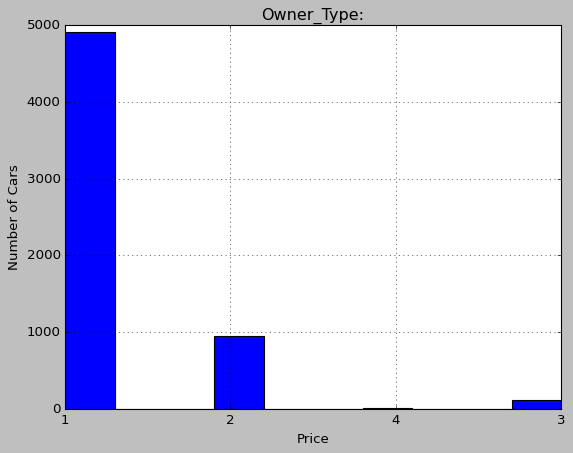

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


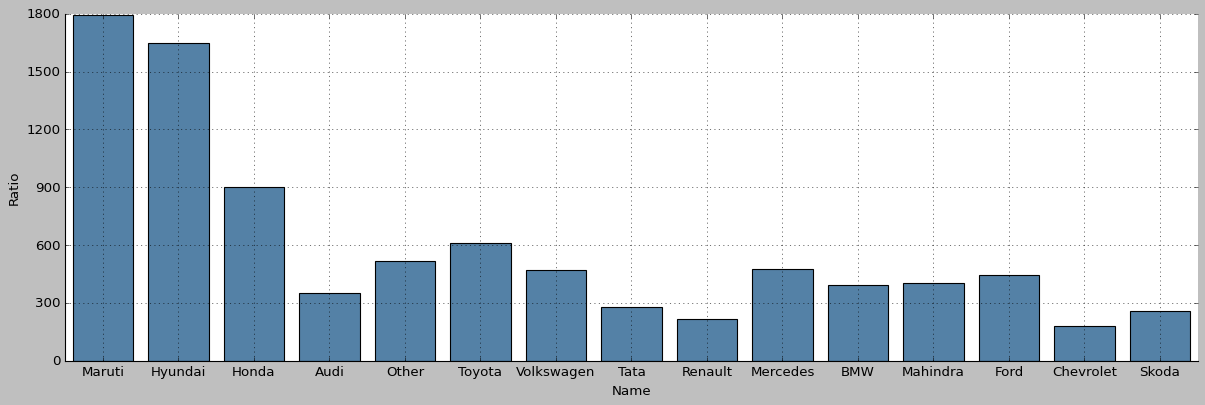

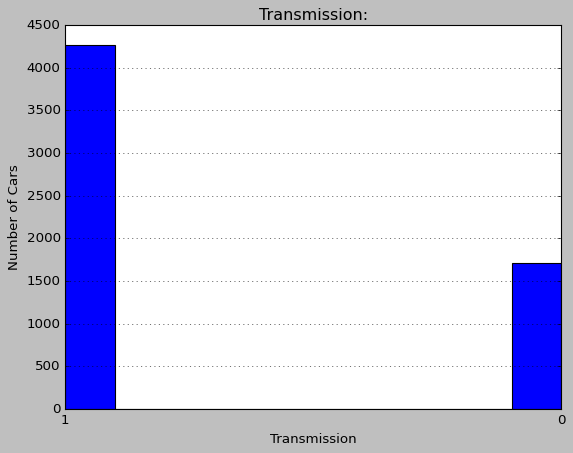

In [ ]:

###### Owner_Type
Owner = master['Owner_Type']
plt.grid(True)     
plt.hist(Owner)
plt.title('Owner_Type:')
plt.ylabel('Number of Cars')
plt.xlabel('Price')
plt.show()


### Name: i wanted to try to do that with seaborn 
### sns.
sns.axes_style('white')
W1 = sns.factorplot('Name', data=master, aspect=3, kind="count", color='steelblue',size=5)
                                #d.set_xticklabels(step=21)
array1 = np.arange(0,3000,300)        
array2 = np.arange(0,10,1) 
W1.set_xticklabels()  
W1.set_yticklabels(array1) #np.arange(0, 255)
W1.set_ylabels("Ratio")
plt.grid(True)

plt.show()

############ Transmission
Transmission = master['Transmission']
plt.grid(True)     
plt.hist(Transmission)
plt.title('Transmission:')
plt.ylabel('Number of Cars')
plt.xlabel('Transmission')
plt.show()


In [ ]:

%load_ext google.colab.data_table

master.groupby(['Fuel_Type','Year','Transmission']).mean()


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


Kilometers_Driven    Mileage       Engine  \
Fuel_Type Year Transmission                                              
Diesel    1998 0                  55300.000000  10.000000  1796.000000   
          2000 1                 141000.000000  13.500000  2739.500000   
          2001 1                 174000.000000   7.500000  2297.000000   
          2002 1                  76500.000000  12.250000  2087.500000   
          2003 1                 112333.333333  14.666667  1794.333333   
...                                        ...        ...          ...   
Petrol    2017 1                  27110.047120  18.774869  1182.774869   
          2018 0                  18569.780000  17.180000  1607.060000   
               1                  20334.666667  18.961905  1211.323810   
          2019 0                  12159.538462  17.307692  1631.538462   
               1                  13061.575758  19.212121  1154.818182   

                                 Power     Seats      Price  
Fuel_Type Year Transmission                                  
Diesel    1998 0             10.000000  5.000000   3.900000  
          2000 1             13.500000  7.000000   1.725000  
          2001 1              7.500000  6.500000   3.600000  
          2002 1             12.250000  6.500000   2.212500  
          2003 1             14.666667  5.000000   2.200000  
...                                ...       ...        ...  
Petrol    2017 1             18.774869  5.036649   6.191361  
          2018 0             17.180000  4.900000  18.668600  
               1             18.961905  5.057143   7.064190  
          2019 0             17.307692  4.769231  17.655385  
               1             19.212121  5.090909   7.101212  

[88 rows x 6 columns]

In [ ]:
master.groupby(['Transmission','Owner_Type']).mean()


Year  Kilometers_Driven    Mileage  \
Transmission Owner_Type                                              
0            1           2014.363507       53063.647897  15.554526   
             2           2011.903915       61883.459075  14.185053   
             3           2008.875000       81866.916667  13.791667   
             4           2008.000000       77000.000000   9.000000   
1            1           2013.781143       56227.026571  19.082000   
             2           2010.901786       75888.791667  17.461310   
             3           2007.597701       90666.459770  15.241379   
             4           2006.714286      145690.428571  11.571429   

                              Engine      Power     Seats      Price  
Transmission Owner_Type                                               
0            1           2076.382751  15.554526  5.188168  20.730520  
             2           2182.569395  14.185053  5.181495  16.245552  
             3           2330.916667  13.791667  4.875000  13.088333  
             4           1995.000000   9.000000  5.000000   5.500000  
1            1           1419.373143  19.082000  5.313143   5.670186  
             2           1472.964286  17.461310  5.306548   4.016935  
             3           1533.114943  15.241379  5.482759   2.713793  
             4           1953.857143  11.571429  6.428571   3.095714

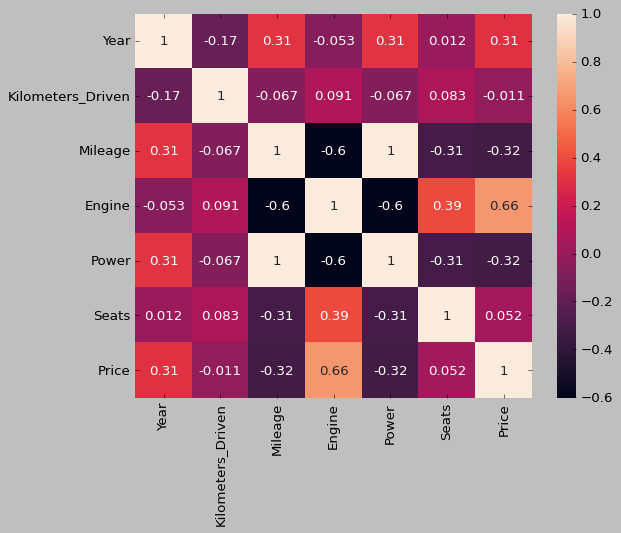

In [ ]:
################# corralation :DDD
corrMatrix = master.corr()
sns.heatmap(corrMatrix, annot=True )
plt.show()

##### Hists:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


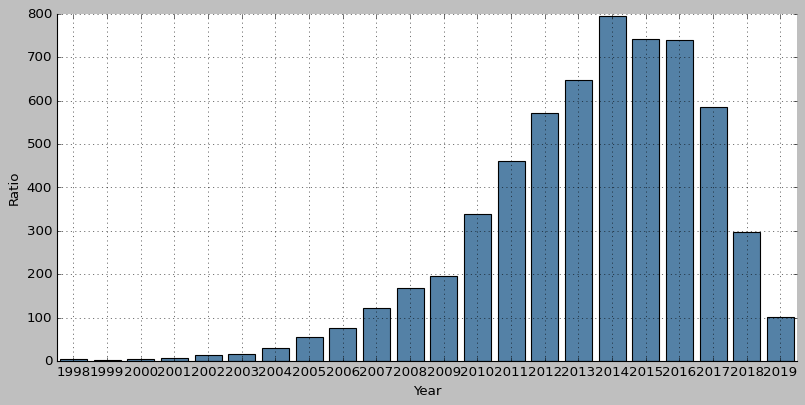

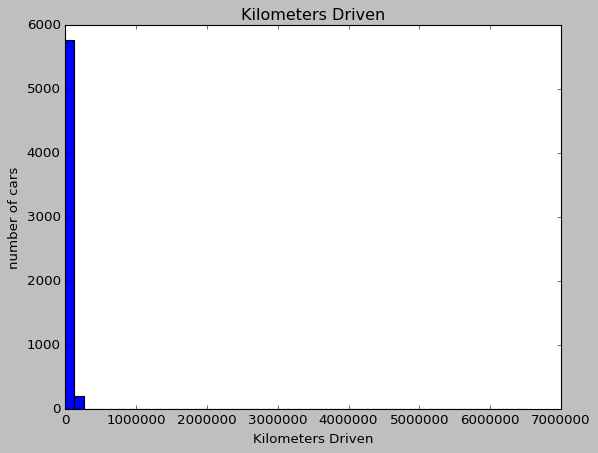

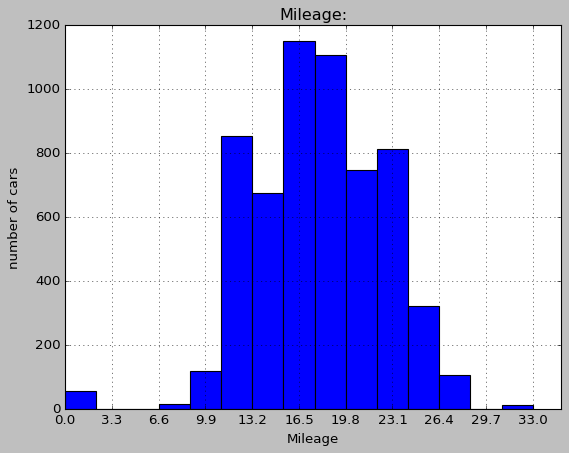

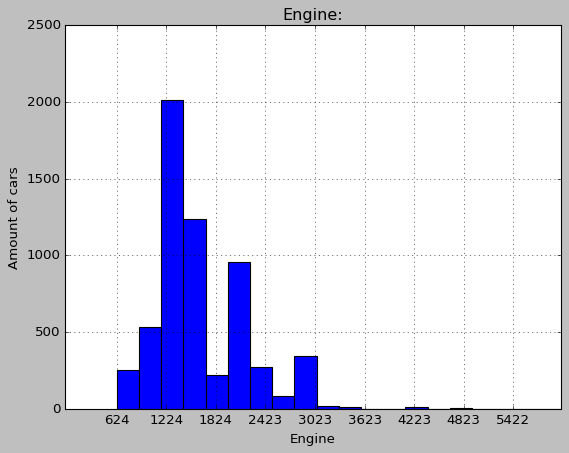

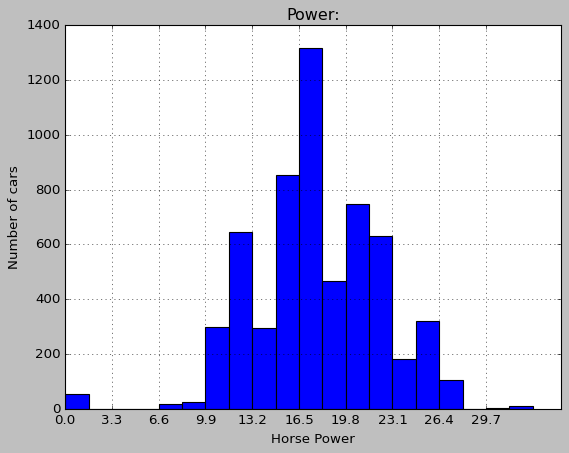

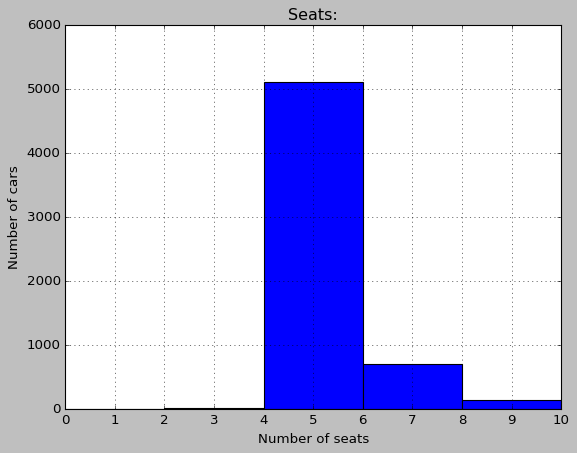

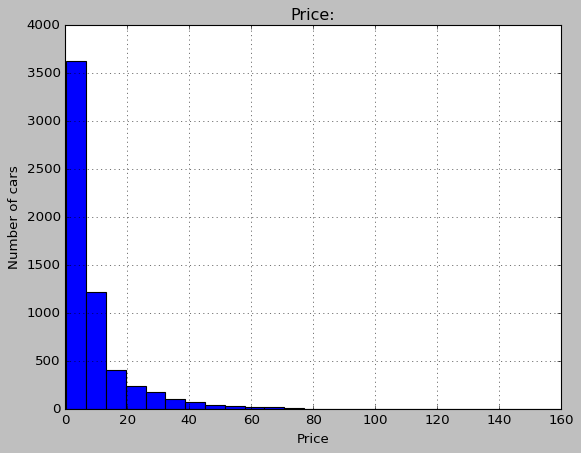

In [ ]:
###### here starts my histograms
    

### Year: i wanted to try to do that with seaborn 
### sns. limit is 16, so i will use 'order' and give it a better range. (it took me the whole day to find it!!!!)
sns.axes_style('white')
W1 = sns.factorplot('Year', data=master, aspect=2, kind="count", color='steelblue',size=5,order=range(1998, 2020))
                                #d.set_xticklabels(step=21)
array1= np.arange(0,1000,100)        
array2= np.arange(0,10,1) 
W1.set_xticklabels()  
W1.set_yticklabels(array1) #np.arange(0, 255)
W1.set_ylabels("Ratio")
plt.grid(True)

plt.show()



# to show killometers with and without the outline, the gaint thing.

##### Kilometers_Driven######################## here are my problems starting,

Kilometers_Driven = master[['Kilometers_Driven']].max(axis=1)   #Arange Mileage column
plt.hist(Kilometers_Driven, bins=50) #rwidth=0.9 , bins=11
plt.ylabel('number of cars')
plt.xlabel('Kilometers Driven')
plt.title('Kilometers Driven')

plt.show()

##### Mileage
Mileage = master[['Mileage']].max(axis=1)   #Arange Mileage column
plt.grid(True)
max_value = Mileage.max()   #will give us the highest index in the column
A = max_value/10    #10 we will be my number of ticks i want. i will need to change number of bins too
plt.hist(Mileage, bins=15) #rwidth=0.9 , bins=11
plt.xticks(np.arange(0, A*11, A))   #will give me order
plt.title('Mileage:')
plt.ylabel('number of cars')
plt.xlabel('Mileage')
plt.show()


###### Engine
Engine = master[['Engine']].max(axis=1)   #Arange  column
plt.grid(True) 
max_value = Engine.max()
min_value = Engine.min()   #i want my hist to start from the lowest number.
A = max_value/10    #10 we will be my number of ticks i want. i will need to change number of bins too
plt.hist(Engine,bins=20)
plt.xticks(np.arange(min_value, A*10, A))   #will give me order. +A is needed to give me edge.
plt.title('Engine:')
plt.ylabel('Amount of cars')
plt.xlabel('Engine')
plt.show()

###### Power
Power = master[['Power']].max(axis=1)   #Arange  column
plt.grid(True) 
max_value = Power.max()
min_value = Power.min()   #i want my hist to start from the lowest number.

A = max_value/10  #10 we will be my number of ticks i want. i will need to change number of bins too
plt.hist(Power,bins=20)
plt.xticks(np.arange(min_value, A*10, A))   #will give me order. +A is needed to give me edge.
plt.title('Power:')
plt.ylabel('Number of cars')
plt.xlabel('Horse Power')
plt.show()

###### Seats
Seats = master[['Seats']].max(axis=1)   #Arange  column
plt.grid(True) 
max_value = Seats.max()
min_value = Seats.min()   #i want my hist to start from the lowest number.
A = max_value/10   #12 we will be my number of ticks i want. i will need to change number of bins too
plt.hist(Seats,bins=5)
plt.xticks(np.arange(min_value, A*11, 1))   #will give me order. +A is needed to give me edge.
plt.title('Seats:')
plt.ylabel('Number of cars')
plt.xlabel('Number of seats')
plt.show()


###### Price
plt.grid(True)     
plt.hist(Price,bins=25)
plt.title('Price:')
plt.ylabel('Number of cars')
plt.xlabel('Price')
plt.show()



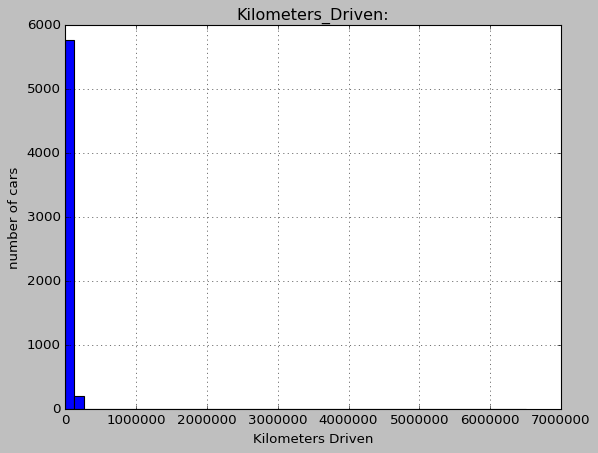

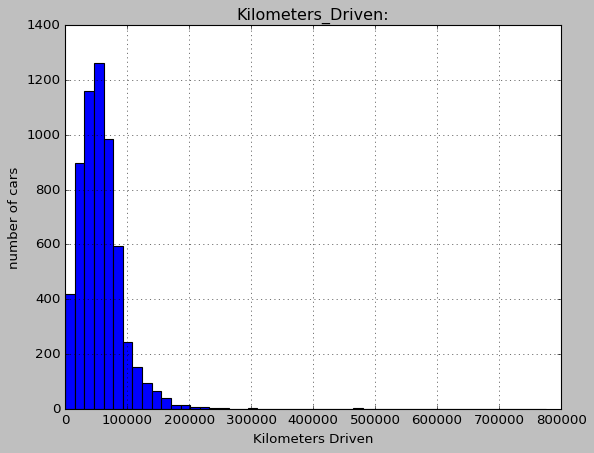

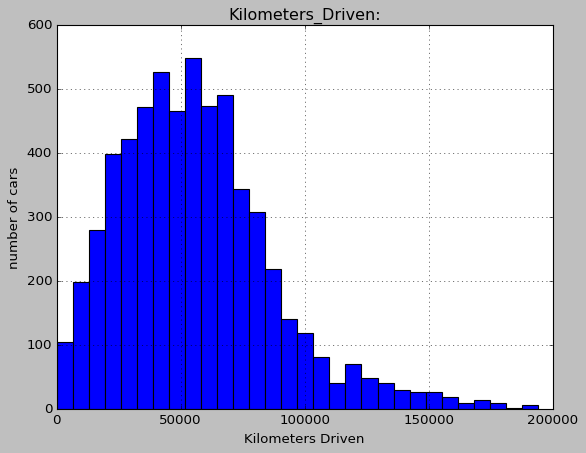

In [ ]:
Kilometers_Driven = master[['Kilometers_Driven']].max(axis=1)   #Arange Mileage column
plt.hist(Kilometers_Driven, bins=50) #rwidth=0.9 , bins=11
plt.ylabel('number of cars')
plt.xlabel('Kilometers Driven')
plt.title('Kilometers_Driven:')
plt.grid(True)     

plt.show()

Kilosub=master[['Kilometers_Driven']].max(axis=1)
Kilosub=Kilosub.drop(Kilosub.idxmax())


plt.title('Kilometers_Driven:')
plt.grid(True)     
plt.hist(Kilosub, bins=50) #rwidth=0.9 , bins=11
plt.ylabel('number of cars')
plt.xlabel('Kilometers Driven')
plt.show()

Kilosub=master[['Kilometers_Driven']].max(axis=1)
for a in range(40): #here i will remove 50 columns. i will delete some data, but it will help me analayze it better
 Kilosub=Kilosub.drop(Kilosub.idxmax())


plt.title('Kilometers_Driven:')
plt.grid(True)     
plt.hist(Kilosub, bins=30) #rwidth=0.9 , bins=11
plt.ylabel('number of cars')
plt.xlabel('Kilometers Driven')
plt.show()



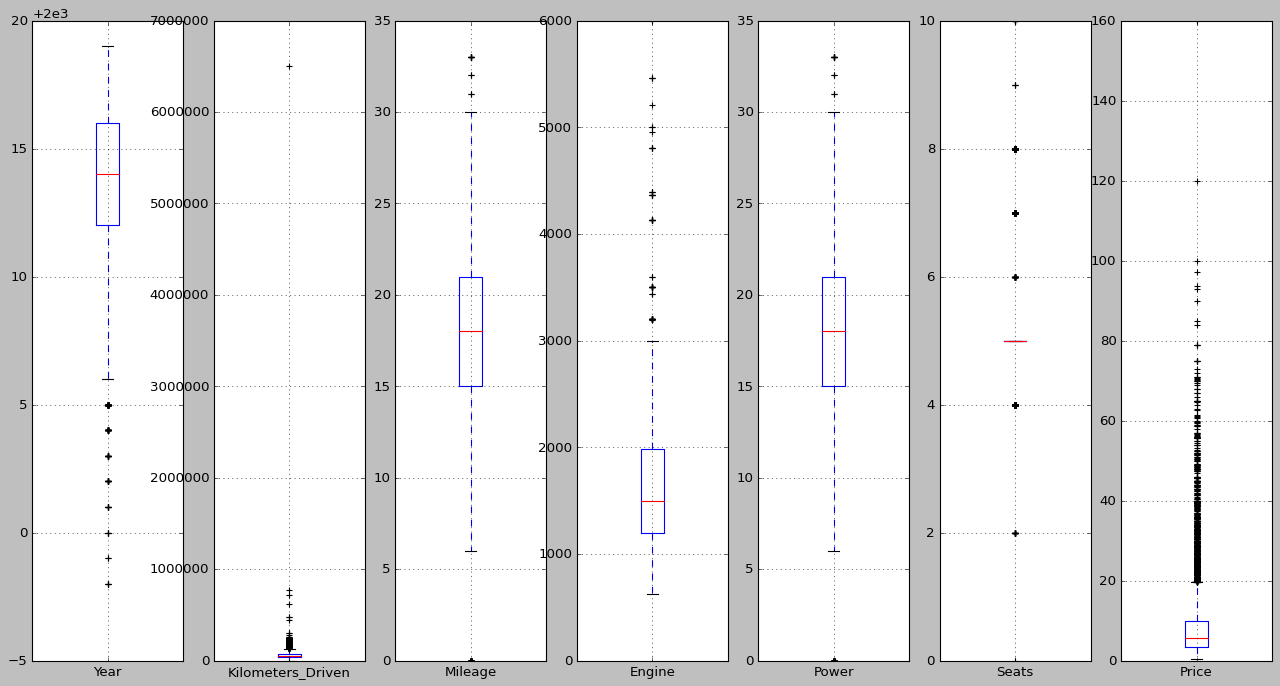

In [ ]:
################################################ box plot:
master.plot(subplots=True, figsize=(20, 10), kind='box', grid=True  )
plt.show()

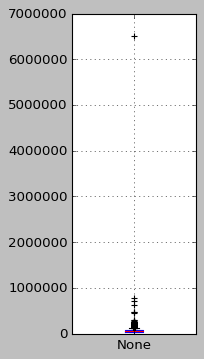

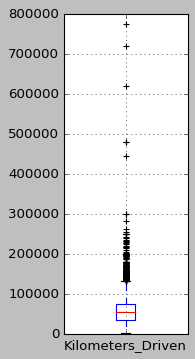

In [ ]:
################################################ box plot kilometers: with and without.
Kilosub=master[['Kilometers_Driven']]
Kilosub=Kilosub.drop(Kilosub['Kilometers_Driven'].idxmax())
Kilometers_Driven.plot(subplots=True, figsize=(2,5), kind='box', grid=True  )
Kilosub.plot(subplots=True, figsize=(2,5), kind='box', grid=True  )

plt.show()



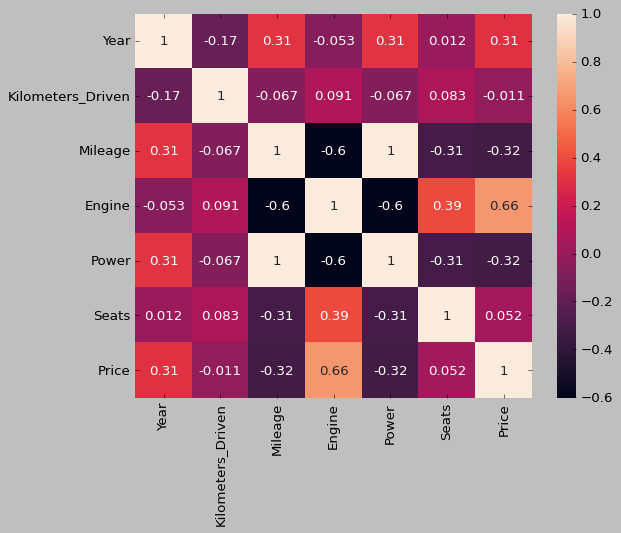

In [ ]:
################# corralation :DDD
corrMatrix = master.corr()
sns.heatmap(corrMatrix, annot=True )
plt.show()
